## Observations and Insights 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = mouse_metadata + study_results
# Display the data table for preview
mouse_results.head()


,Age_months,Drug Regimen,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
0,NaN,NaN,NaN,k403b128,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,s185f932,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,x401g107,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,m601a457,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,g791c819,NaN,NaN,NaN,NaN


In [5]:
# Checking the number of mice.
mouse_count = mouse_metadata.count()
print(mouse_count)
print("There are 249 Mice")

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
There are 249 Mice


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
real_mouse_count = study_results[["Mouse ID","Timepoint"]].value_counts()
print(real_mouse_count.head(10))

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
j235      0            1
i177      10           1
          20           1
          25           1
          30           1
dtype: int64


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_count_id = mouse_metadata["Mouse ID"] + study_results["Mouse ID"]
print(mouse_count_id)

0       k403b128
1       s185f932
2       x401g107
3       m601a457
4       g791c819
          ...   
1888         NaN
1889         NaN
1890         NaN
1891         NaN
1892         NaN
Name: Mouse ID, Length: 1893, dtype: object


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = pd.DataFrame(mouse_count_id)
mouse_df.head()

,Mouse ID
0,k403b128
1,s185f932
2,x401g107
3,m601a457
4,g791c819


In [23]:
# Checking the number of mice in the clean DataFrame.
mouse_df.count

<bound method DataFrame.count of       Mouse ID
0     k403b128
1     s185f932
2     x401g107
3     m601a457
4     g791c819
...        ...
1888       NaN
1889       NaN
1890       NaN
1891       NaN
1892       NaN

[1893 rows x 1 columns]>

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_avg = study_results(["Tumor Volume"],
    "mean",
    "median",
    "variance",
    "standard",
    "SEM")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_avg_pd = mouse_avg.pd
print(mouse_avg_pd)


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_avg = study_results(["Tumor Volume"],
    "mean",
    "median",
    "variance",
    "standard",
    "SEM")
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<BarContainer object of 1893 artists>

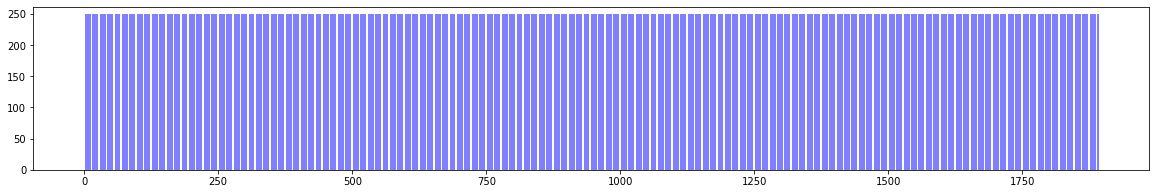

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
x_axis = np.arange(len(mouse_df))
ticks = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_count["Mouse ID"], color='b', alpha=0.5, align="center")

<BarContainer object of 1893 artists>

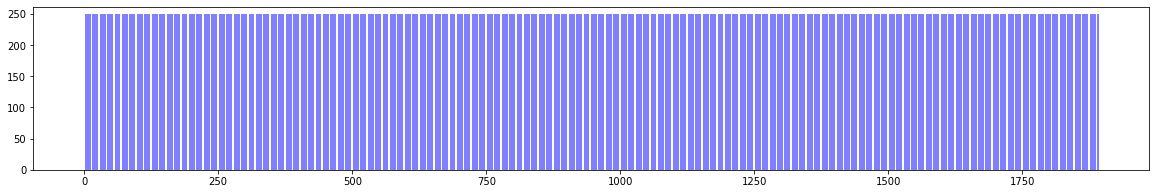

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mouse_df))
ticks = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_count["Drug Regimen"], color='b', alpha=0.5, align="center")


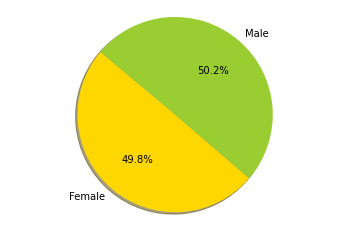

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = 'Female', 'Male'
sizes = [124, 125]
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

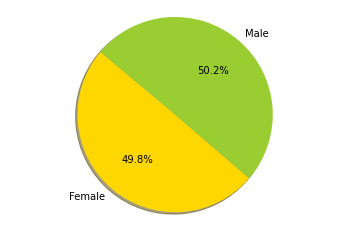

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Female', 'Male'
sizes = [124, 125]
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
med = study_results(["Medicine"],
    "Capomulin",
    "Ramicane",
    "Infubinol",
    "Ceftamin")

# Start by getting the last (greatest) timepoint for each mouse
mouse_weight = mouse_metadata(["Weight"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
med_weight = med + mouse_weight
print(med_weight)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
med.describe
# Create empty list to fill with tumor vol data (for plotting)
mouse_tum = 0
if mouse_metadata(["Weight"]),
    mouse_tum + 1
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
if mouse_tum >= 20
    append mouse_metadata(["Weight"])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
mouse_metadata([["Capomulin","Ramicane","Infubinol","Ceftamin"]]).count 
    
    # add subset 
mouse_metadata + med
    
    # Determine outliers using upper and lower bounds
if mouse_tum <= 10
    append mouse_metadata(["Weight"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d3ada62070>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3add437c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3add452b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3add86310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3add86b50>],
 'means': []}

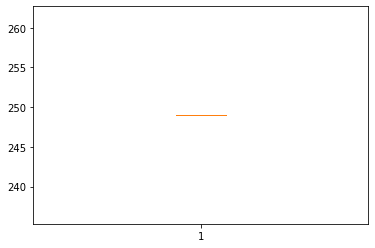

In [6]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(mouse_count)

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(len(mouse_df))
ticks = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.show(x_axis, mouse_count["Mouse ID"])

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = np.arange(len(mouse_df))
ticks = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.scatter(x_axis, mouse_count["Mouse ID"], color='b', alpha=0.5, align="center")

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


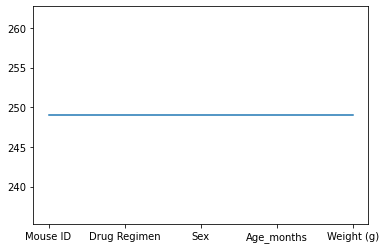

In [11]:
plt.plot(mouse_count)